In [177]:
# Import the required libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import json
import skimage as ski
from skimage import transform

In [178]:
#Your code here
path = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A2B2_T1wT2w/'

v1_info = nib.load(path + '3D_T1w_20240920074836_A2B2.nii.gz').header
v1 = nib.load(path + '3D_T1w_20240920074836_A2B2.nii.gz').get_fdata()  # Extract actual data

print(v1_info)
print(v1_info['pixdim'])

titel_size = 18
label_size = 16


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 54
dim             : [  3 256 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     0.6    0.3125 0.3125 0.999  0.     0.     0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'TE=11;Time=84217.000')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x    

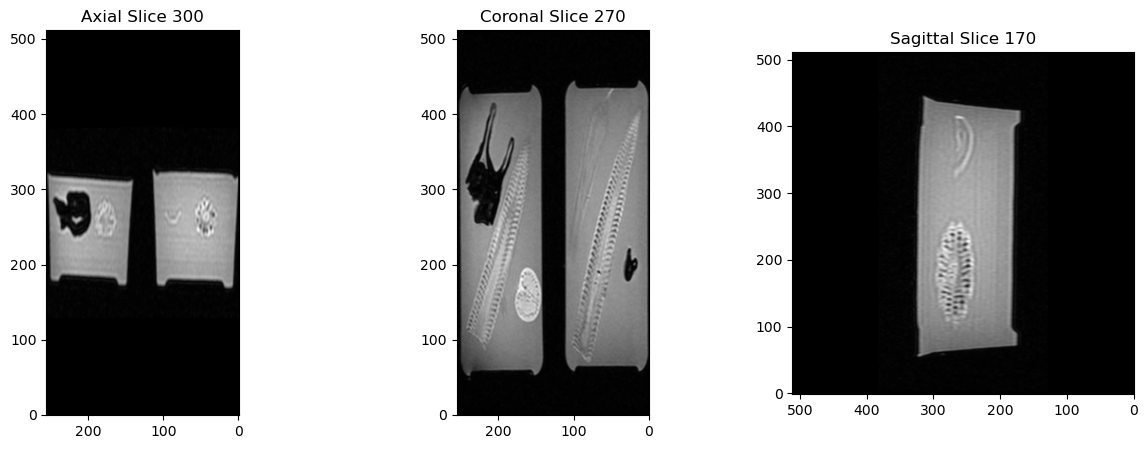

In [179]:
import matplotlib.pyplot as plt
from skimage import transform

# Axial slice (along the Z-axis)
axial_slice = v1[:, :, 300]  # slice 300

# Coronal slice (along the Y-axis)
coronal_slice = v1[:, 270, :]  # slice 270

# Sagittal slice (along the X-axis)
sagittal_slice = v1[70,:, :]  # slice 170



# Visualize all three slices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Axial slice (flip horizontally to correct orientation)
axes[0].imshow(axial_slice.T, cmap='gray', origin='lower')
axes[0].invert_xaxis()  # Flip to move the small tube to the right
axes[0].set_title('Axial Slice 300')

# Display Coronal slice (flip horizontally for radiological convention)
axes[1].imshow(transform.rotate(coronal_slice.T, angle=0), cmap='gray', origin='lower')
axes[1].invert_xaxis()  # Flip for radiological convention
axes[1].set_title('Coronal Slice 270')

# Display Sagittal slice (flip horizontally for radiological convention)
axes[2].imshow(sagittal_slice.T, cmap='gray', origin='lower')
axes[2].invert_xaxis()  # Flip for radiological convention
axes[2].set_title('Sagittal Slice 170')

plt.show()

Voxel size (mm): [0.6    0.3125 0.3125]


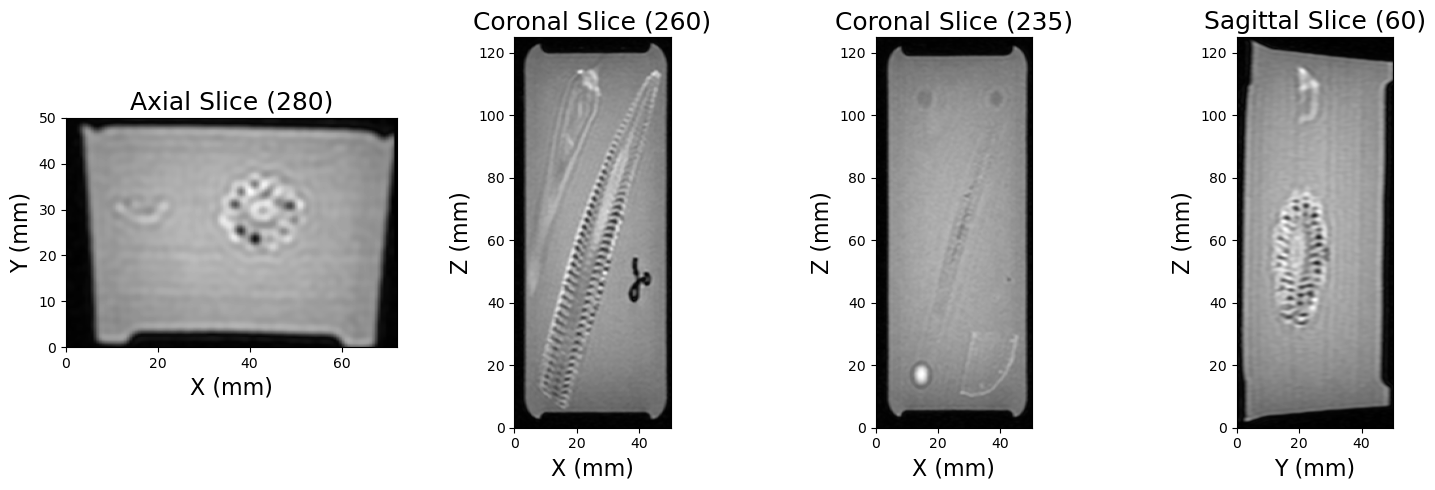

In [180]:
v1_info = nib.load(path + '3D_T1w_20240920074836_A2B2.nii.gz').header
voxel_size = v1_info['pixdim'][1:4]  # Voxel size in mm along each axis (x, y, z)
print(f"Voxel size (mm): {voxel_size}")

# Cropping region (adjust based on your phantom location) Det er her man ændrer på zoom ind og ud
x_range = slice(0, 120)  # Along X-axis (sagittal)
y_range = slice(170, 330)  # Along Y-axis (coronal)
z_range = slice(50, 450)   # Along Z-axis (axial)



# Crop the dataset
cropped_v1 = v1[x_range, y_range, z_range]

# Visualize the cropped dataset slices
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Calculate extent for axis labels (in mm)
extent_axial = [0, cropped_v1.shape[0] * voxel_size[0], 0, cropped_v1.shape[1] * voxel_size[1]]  # for axial view
extent_coronal = [0, cropped_v1.shape[1] * voxel_size[1], 0, cropped_v1.shape[2] * voxel_size[2]]  # for coronal view
extent_sagittal = [0, cropped_v1.shape[1] * voxel_size[1], 0, cropped_v1.shape[2] * voxel_size[2]]  # for sagittal view

# Correct slice indices relative to the cropped data
axial_idx = (280 - z_range.start)  # Adjust index based on z-range cropping
coronal_idx1 = (260 - y_range.start)  # Adjust index based on y-range cropping
coronal_idx2 = (235 - y_range.start)  # Adjust index based on y-range cropping
sagittal_idx = (60 - x_range.start)  # Adjust index based on x-range cropping

# Display Axial slice (mirrored vertically)
axial_slice = cropped_v1[:, :, axial_idx]
axial_slice_mirrored = np.flip(axial_slice, axis=0)  # Mirror the axial slice vertically
axes[0].imshow(axial_slice_mirrored.T, cmap='gray', origin='lower', extent=extent_axial)
axes[0].set_title('Axial Slice (280)', fontsize=titel_size ) # Vertically Mirrored' #(Z-axis)
axes[0].set_xlabel('X (mm)',fontsize=label_size)
axes[0].set_ylabel('Y (mm)',fontsize=label_size)

# Display Coronal slice
# Display Coronal slice (adjusting aspect ratio)
coronal_slice = cropped_v1[:, coronal_idx1, :]
coronal_slice_mirrored1 = np.flip(coronal_slice, axis=0)  # Mirror the axial slice vertically
axes[1].imshow(coronal_slice_mirrored1.T, cmap='gray', origin='lower',extent=extent_coronal)
#axes[1].invert_xaxis()  # Flip x-axis for correct orientation
axes[1].set_title('Coronal Slice (260)', fontsize=titel_size) #(Y-axis)
axes[1].set_xlabel('X (mm)',fontsize=label_size)
axes[1].set_ylabel('Z (mm)',fontsize=label_size)

# Display Coronal slice
# Display Coronal slice (adjusting aspect ratio)
coronal_slice = cropped_v1[:, coronal_idx2, :]
coronal_slice_mirrored2 = np.flip(coronal_slice, axis=0)  # Mirror the axial slice vertically
axes[2].imshow(coronal_slice_mirrored2.T, cmap='gray', origin='lower',extent=extent_coronal)
#axes[2].invert_xaxis()  # Flip x-axis for correct orientation
axes[2].set_title('Coronal Slice (235)', fontsize=titel_size) #(Y-axis)
axes[2].set_xlabel('X (mm)',fontsize=label_size)
axes[2].set_ylabel('Z (mm)',fontsize=label_size)

# Display Sagittal slice
sagittal_slice = cropped_v1[sagittal_idx, :, :]
sagittal_slice_mirrored = np.flip(sagittal_slice, axis=0)  # Mirror the axial slice vertically
axes[3].imshow(sagittal_slice_mirrored.T, cmap='gray', origin='lower',extent=extent_sagittal)
#axes[3].invert_xaxis()
axes[3].set_title('Sagittal Slice (60)', fontsize=titel_size) #(X-axis)
axes[3].set_xlabel('Y (mm)',fontsize=label_size)
axes[3].set_ylabel('Z (mm)',fontsize=label_size)

plt.tight_layout()
plt.show()


#### Scalebars

TypeError: Invalid shape (256, 512, 512) for image data

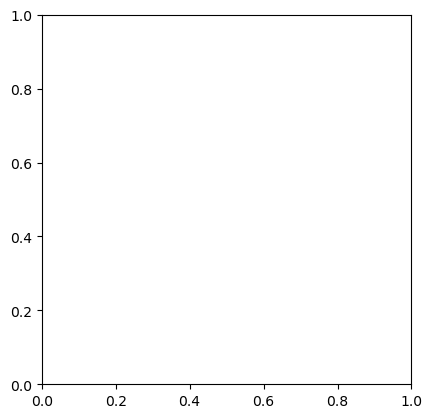

In [181]:
def plot_with_scalebars(image, index, pixel_spacing, scalebars, plane):

    pixel_spacing_x = pixel_spacing[0]  # Pixel dimension in x-direction 
    pixel_spacing_y = pixel_spacing[1]  # Pixel dimension in y-direction

    # Handle scalebars input that might be a tuple of lists of dictionaries
    if isinstance(scalebars, tuple):
        scalebars = [item for sublist in scalebars for item in sublist]
    
    # Plotting the cropped slice with scalebars
    plt.figure(figsize=(18, 9))
    plt.imshow(image, cmap='gray')
    plt.title(f'{plane} Slice at Index {index} with scalebars')
    plt.xlabel('R-L [pixels]')  # Right to Left direction for x-axis                                            
    plt.ylabel('A-P [pixels]')  # Anterior to Posterior direction for y-axis      
    plt.gca().invert_yaxis()      

    # Plot each scalebar
    for scalebar in scalebars:
        length = scalebar['length']
        (x_start, y_start) = scalebar['position']
        (x_direction, y_direction) = scalebar['direction']
        
        # Calculate scalebar length in pixels
        length_pixels_x = (length / pixel_spacing_x) * x_direction
        length_pixels_y = (length / pixel_spacing_y) * y_direction
        
        #print(length_pixels_x, length_pixels_y)

        x_end = x_start + length_pixels_x
        y_end = y_start + length_pixels_y

        # Plot the scalebar
        plt.plot([x_start, x_end], [y_start, y_end], color='red', linewidth=2)
        plt.text(x_start + 5, y_start - 5, f'{length}', color='white', fontsize=10, backgroundcolor='black')

pixel_dims = v1_info.get_zooms()
pixel_spacing = pixel_dims[0], pixel_dims[1]

majs_pixels_x_a = 18
majs_scalebars_a = [{'length': majs_pixels_x_a, 'position': (22, 21), 'direction': (1, 0)}]


majs_pixels_x_c = 47
majs_pixels_y_c = 108
majs_scalebars_c = [{'length': majs_pixels_x_c, 'position': (112, 20), 'direction': (-1, 0)}, {'length': majs_pixels_y_c, 'position': (112, 365), 'direction': (0, -1)}]

#plot_with_scalebars(coronal_slice_mirrored1.T, 260, pixel_spacing, majs_scalebars_c, 'Coronal')

plt.figure()
plt.imshow(v1)


In [ ]:
majs_length_x_c = 0.3125 * majs_pixels_x_c
majs_length_y_c = 0.3125 * majs_pixels_y_c

# r_majs = majs_length_x_a/2
# print('Majs radius:', r_majs)

h_majs = np.sqrt(majs_length_x_c**2+majs_length_y_c**2)
print('Majs højde:', h_majs)

# V_majs = (np.pi/3)*r_majs**2*h_majs
# print('Majs volumen:', V_majs)

Majs højde: 36.80740626898342


#### Echo times

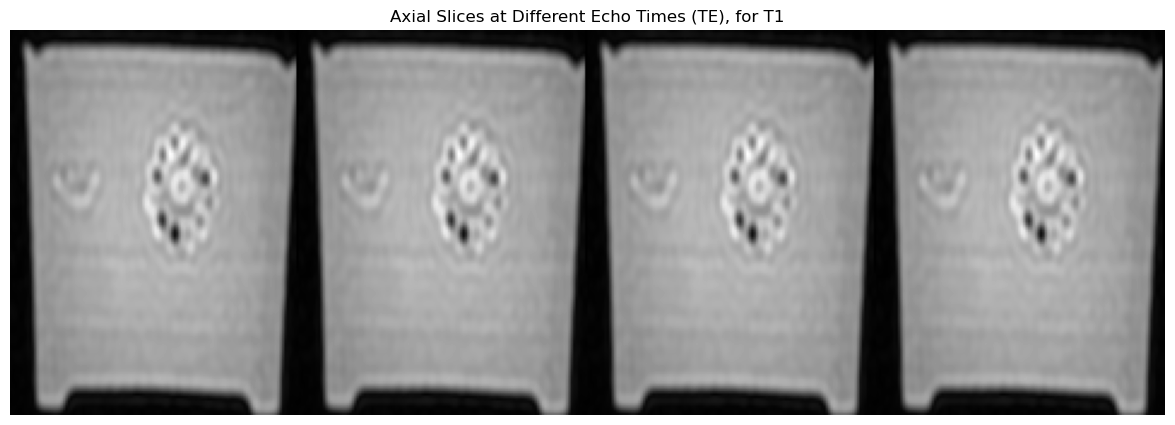

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Coordinates for the cropped phantom (adjust as per your cropping)
x_start, x_end = 0, 120  # Focus more on the phantom region along X-axis
y_start, y_end = 170, 330  # Focus more on the phantom region along Y-axis
z_slice = 280  # Choose a slice number for axial view


# Load the four NIFTI datasets with different echo times
file1 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A2B2_T1wT2w/3D_T1w_20240920074836_A2B2.nii.gz'
file2 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A2B2_T1wT2w/3D_T1w_20240920074836_A2B2.nii.gz'
file3 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A2B2_T1wT2w/3D_T1w_20240920074836_A2B2.nii.gz'
file4 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A2B2_T1wT2w/3D_T1w_20240920074836_A2B2.nii.gz'


# Load data and apply cropping to phantom coordinates
v_1 = nib.load(file1).get_fdata()[x_start:x_end, y_start:y_end, :]
v_2 = nib.load(file2).get_fdata()[x_start:x_end, y_start:y_end, :]
v_3 = nib.load(file3).get_fdata()[x_start:x_end, y_start:y_end, :]
v_4 = nib.load(file4).get_fdata()[x_start:x_end, y_start:y_end, :]

# Select the same axial slice from each dataset, rotate 90 degrees counterclockwise, and flip horizontally
i_1 = np.fliplr(np.rot90(v_1[:, :, z_slice]))
i_2 = np.fliplr(np.rot90(v_2[:, :, z_slice]))
i_3 = np.fliplr(np.rot90(v_3[:, :, z_slice]))
i_4 = np.fliplr(np.rot90(v_4[:, :, z_slice]))

# Stack the images horizontally and plot
plt.figure(figsize=(15, 5))
plt.imshow(np.hstack([i_1, i_2, i_3, i_4]), cmap='gray')
plt.title('Axial Slices at Different Echo Times (TE), for T1')
plt.xlabel('TE 4ms | TE 15ms | TE 30ms | TE 50ms')
plt.axis('off')  # Turn off axis for better visualization
plt.show()


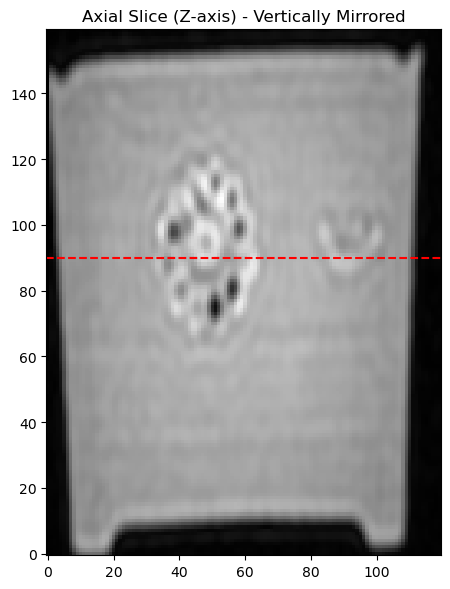

In [ ]:
#Definer positionen for den røde linje
line_position = 90  # Fast sætning af linjens y-værdi til 45

# Ekstraktion af slice for det første billede (TE4ms) og tilføj en rød linje til at vise profilretningen
plt.figure(figsize=(6, 6))

i_1_rot = np.rot90(i_1, 2)
i_2_rot = np.rot90(i_2, 2)
i_3_rot = np.rot90(i_3 ,2)
i_4_rot = np.rot90(i_4, 2)


# Display Axial slice (med lodret spejling)
axial_slice = cropped_v1[:, :, axial_idx]
axial_slice_mirrored = np.flip(axial_slice, axis=0)  # Lodret spejling af axialt snit
plt.imshow(i_1_rot, cmap='gray', origin='lower')
plt.title('Axial Slice (Z-axis) - Vertically Mirrored')
plt.axhline(y=line_position, color='red', linestyle='--')  # Rød linje ved y=45

plt.tight_layout()
plt.show()



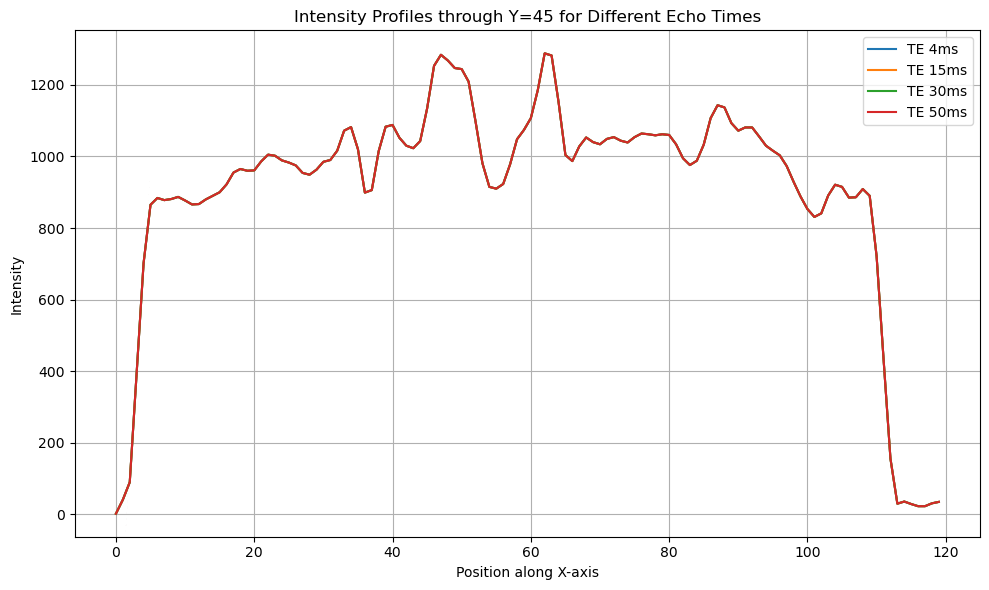

In [ ]:
# Vælg en profilretning langs X-aksen ved y=45
profile_y = 90  # Fast position for profilen i Y-aksen

# Ekstraktion af intensitetsprofiler langs X-aksen ved y=45
profile1 = i_1_rot[ profile_y, :]
profile2 = i_2_rot[profile_y , :]
profile3 = i_3_rot[profile_y, :]
profile4 = i_4_rot[ profile_y, :]

# Plot intensitetsprofilerne for hver ekkotid
plt.figure(figsize=(10, 6))
plt.plot(profile1, label='TE 4ms')
plt.plot(profile2, label='TE 15ms')
plt.plot(profile3, label='TE 30ms')
plt.plot(profile4, label='TE 50ms')

plt.title('Intensity Profiles through Y=45 for Different Echo Times')
plt.xlabel('Position along X-axis')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
